<a href="https://colab.research.google.com/github/Cairo-Henrique/Fundamentos-da-Programacao-de-Computadores-USP/blob/main/FPC_Lista_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1xTELcsTAppicf4RquLVmzpK4Sy84JwcL
!gdown 1DZZeQIhwXbUeDIgDbXHyJEYtBflWUs3x

Downloading...
From: https://drive.google.com/uc?id=1xTELcsTAppicf4RquLVmzpK4Sy84JwcL
To: /content/stinkbug.png
100% 108k/108k [00:00<00:00, 78.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DZZeQIhwXbUeDIgDbXHyJEYtBflWUs3x
To: /content/concrete.jpg
100% 76.4k/76.4k [00:00<00:00, 82.5MB/s]


Questão 1


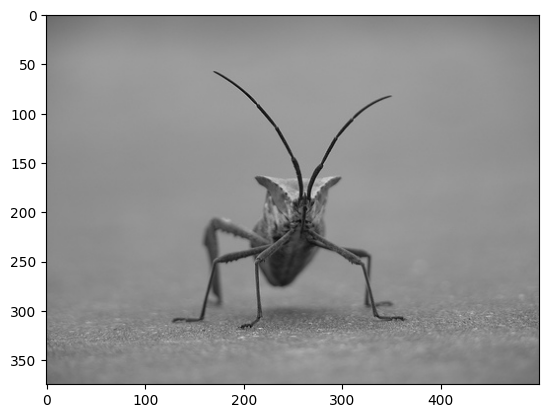

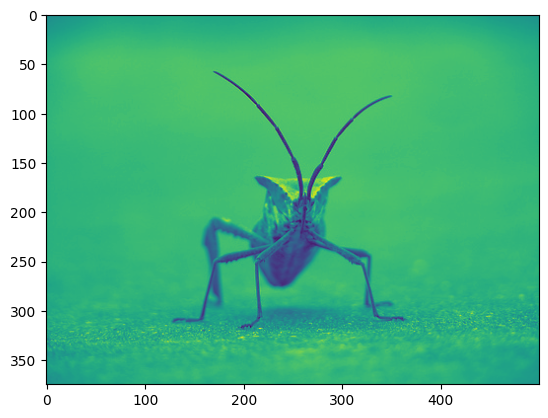

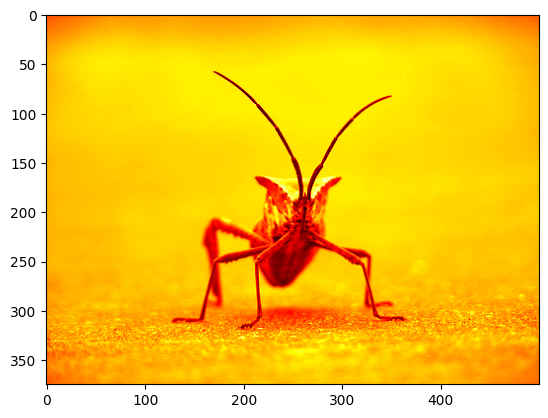

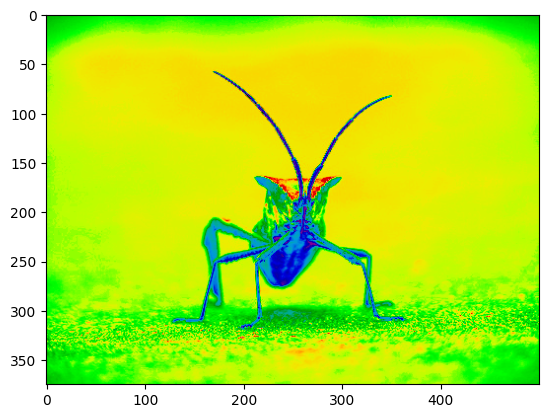

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('stinkbug.png')

plt.figure()
plt.imshow(img)
plt.show()

A = img[:, :, 0]

plt.figure()
plt.imshow(A)
plt.show()

plt.figure()
plt.imshow(A, cmap="hot")
plt.show()

plt.figure()
plt.imshow(A, cmap="nipy_spectral")
plt.show()

Questão 2

(375, 500)


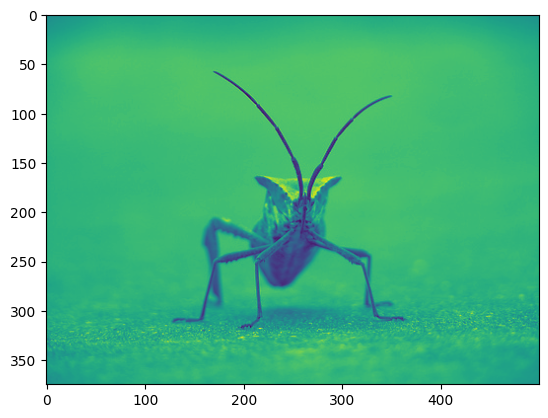

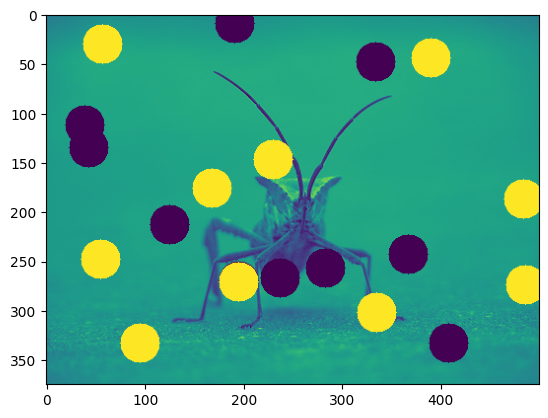

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from random import randint

def ponto_aleatorio(A): # gera i,j aleatório para ser o centro das manchas circulares
  i_aleatorio = randint(1, A.shape[0]-1)
  j_aleatorio = randint(1, A.shape[1]-1)
  return i_aleatorio, j_aleatorio

def gera_mancha(A, cor):
  i_aleatorio, j_aleatorio = ponto_aleatorio(A)
  for i in range(A.shape[0]): # itera sobre todas as componentes de A
    for j in range(A.shape[1]):
      if (i - i_aleatorio)**2 + (j - j_aleatorio)**2 <= raio**2: # se a componente estiver na bola fechada, pinta de cor = 0 ou cor = 1
        A[i,j] = cor
  return A

img = mpimg.imread('stinkbug.png')
A = img[:, :, 0]
print(A.shape)

plt.figure()
plt.imshow(A)
plt.show()

N = 20 # número de manchas circulares
raio = 20 # raio das manchas circulares

# Manchas pretas
for i in range(int(N/2)):
  A = gera_mancha(A, 0)

# Manchas brancas
for i in range(int(N/2)):
  A = gera_mancha(A, 1)

plt.figure()
plt.imshow(A)
plt.show()

Questão 3

(375, 500)


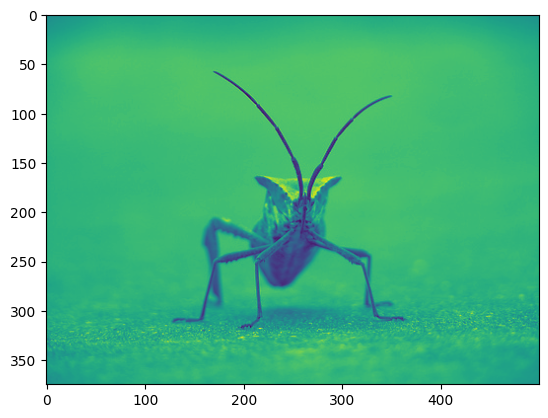

----------------------------------------------------------------------
1a suavizada:


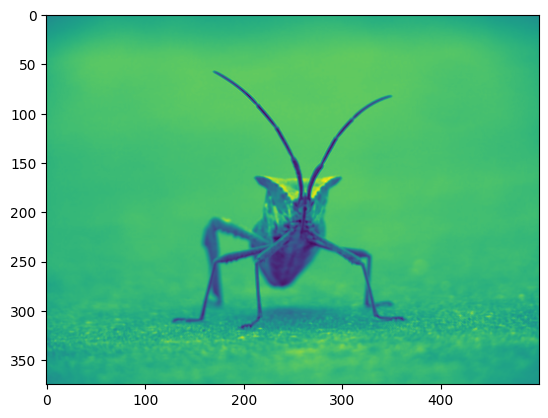

----------------------------------------------------------------------
2a suavizada:


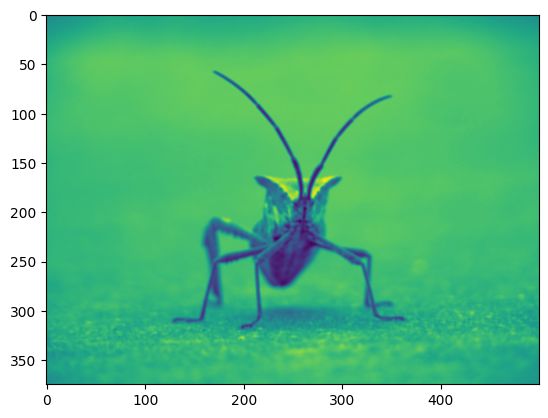

----------------------------------------------------------------------
3a suavizada:


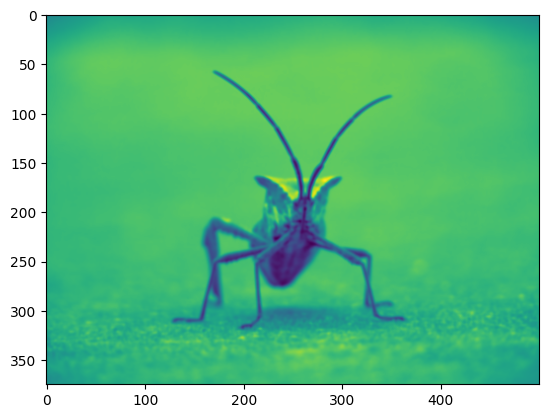

----------------------------------------------------------------------
4a suavizada:


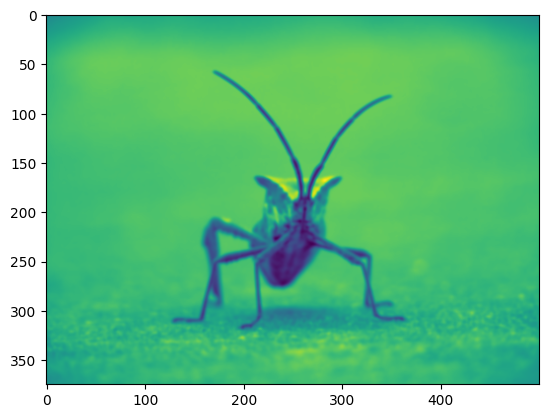

----------------------------------------------------------------------
5a suavizada:


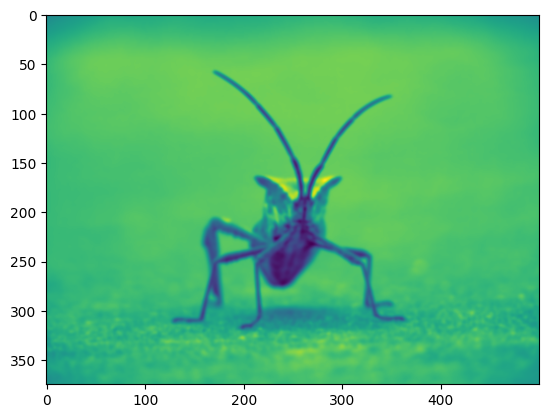

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def suaviza_adjacentes(A):
  B = A.copy()

  # pixels nos 4 cantos
  # (0,0)
  B[0,0] = (1/3) * (A[0,0] + A[1,0] + A[0,1])

  # (0, A.shape[1]-1)
  B[0, A.shape[1]-1] = (1/3) * (A[0, A.shape[1]-1] + A[1, A.shape[1]-1] + A[0, A.shape[1]-2])

  # (A.shape[0]-1, 0)
  B[A.shape[0]-1, 0] = (1/3) * (A[A.shape[0]-1, 0] + A[A.shape[0]-2, 0] + A[A.shape[0]-1, 1])

  # (A.shape[0]-1, A.shape[1]-1)
  B[A.shape[0]-1, A.shape[1]-1] = (1/3) * (A[A.shape[0]-1, A.shape[1]-1] + A[A.shape[0]-2, A.shape[1]-1] + A[A.shape[0]-1, A.shape[1]-2])

  # pixels na borda horizontal superior
  for j in range(1, A.shape[1]-1):
    B[0,j] = (1/4) * (A[0,j] + A[0,j+1] + A[0,j-1] + A[1,j])

  # pixels na borda horizontal inferior
  for j in range(1, A.shape[1]-1):
    B[A.shape[0]-1,j] = (1/4) * (A[A.shape[0]-1,j] + A[A.shape[0]-1,j+1] + A[A.shape[0]-1,j-1] + A[A.shape[0]-2,j])

  # pixels na borda vertical esquerda
  for i in range(1, A.shape[0]-1):
    B[i,0] = (1/4) * (A[i,0] + A[i+1,0] + A[i-1,0] + A[i,1])

  # pixels na borda vertical direita
  for i in range(1, A.shape[0]-1):
    B[i,A.shape[1]-1] = (1/4) * (A[i,A.shape[1]-1] + A[i+1,A.shape[1]-1] + A[i-1,A.shape[1]-1] + A[i,A.shape[1]-2])

  # pixels no interior
  for i in range(1, A.shape[0]-1):
    for j in range(1, A.shape[1]-1):
      B[i,j] = (1/5) * (A[i,j] + A[i+1,j] + A[i-1,j] + A[i,j+1] + A[i,j-1])
  return B

img = mpimg.imread('stinkbug.png')
A = img[:, :, 0]
print(A.shape)

plt.figure()
plt.imshow(A)
plt.show()

N = 5

# Aplicar suavização N vezes
for iteracao in range(1,N+1):
  print('-'*70)
  print(f'{iteracao}a suavizada:')
  A = suaviza_adjacentes(A)

  plt.figure()
  plt.imshow(A)
  plt.show()


Questão 3 - parte 2

(375, 500)


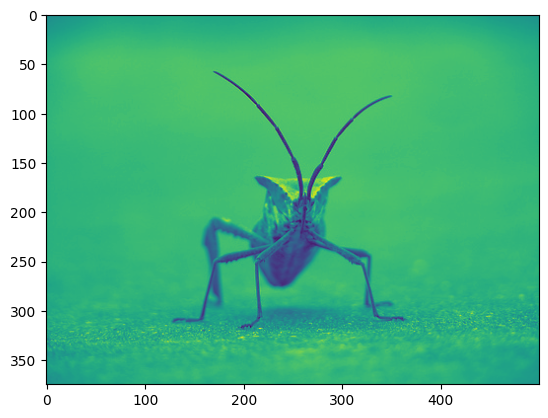

----------------------------------------------------------------------
1a suavizada:


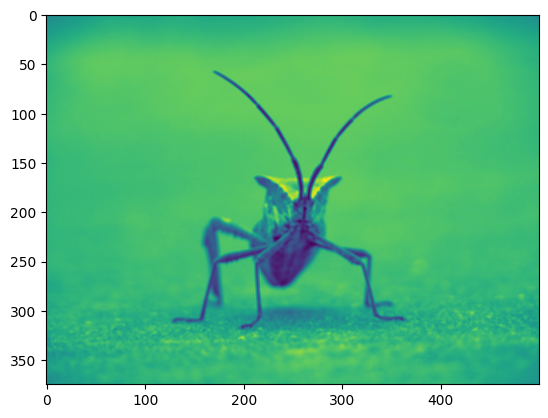

----------------------------------------------------------------------
2a suavizada:


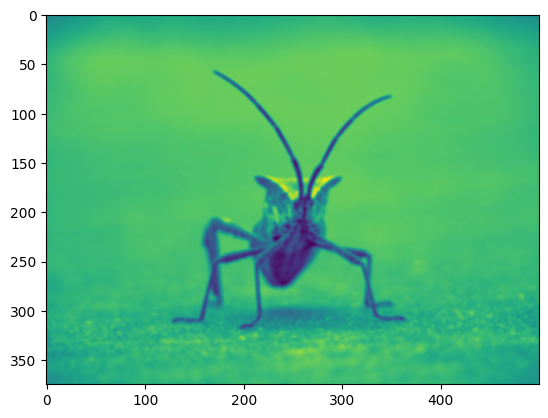

----------------------------------------------------------------------
3a suavizada:


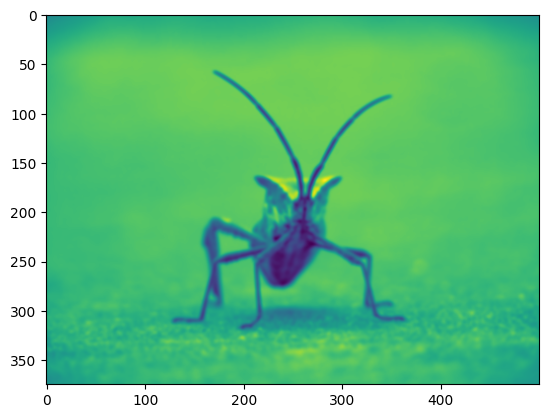

----------------------------------------------------------------------
4a suavizada:


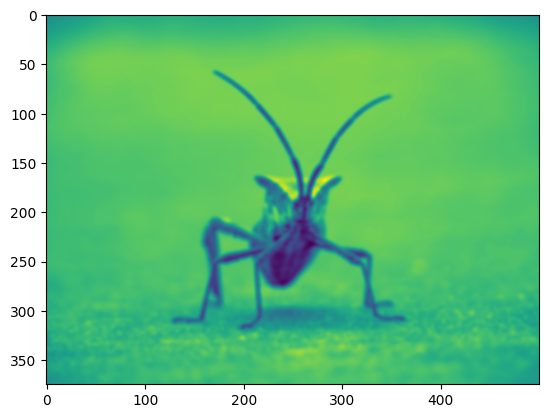

----------------------------------------------------------------------
5a suavizada:


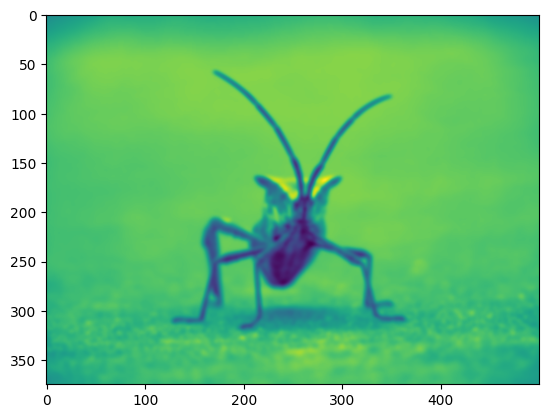

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def suaviza_adjacentes_diagonais(A):
  B = A.copy()

  # pixels nos 4 cantos
  # (0,0)
  B[0,0] = (1/4) * (A[0,0] + A[0,1] + A[1,0] + A[1,1])

  # (0, A.shape[1]-1)
  B[0, A.shape[1]-1] = (1/4) * (A[0, A.shape[1]-1] + A[0, A.shape[1]-2] + A[1, A.shape[1]-1] + A[1, A.shape[1]-2])

  # (A.shape[0]-1, 0)
  B[A.shape[0]-1, 0] = (1/4) * (A[A.shape[0]-1, 0] + A[A.shape[0]-2, 0] + A[A.shape[0]-1, 1] + A[A.shape[0]-2, 1])

  # (A.shape[0]-1, A.shape[1]-1)
  B[A.shape[0]-1, A.shape[1]-1] = (1/4) * (A[A.shape[0]-1, A.shape[1]-1] + A[A.shape[0]-2, A.shape[1]-1] + A[A.shape[0]-1, A.shape[1]-2] + A[A.shape[0]-2, A.shape[1]-2])

  # pixels na borda horizontal superior
  for j in range(1, A.shape[1]-1):
    B[0,j] = (1/6) * (A[0,j] + A[0,j-1] + A[0,j+1] + A[1,j-1] + A[1,j] + A[1,j+1])

  # pixels na borda horizontal inferior
  for j in range(1, A.shape[1]-1):
    B[A.shape[0]-1,j] = (1/6) * (A[A.shape[0]-1,j] + A[A.shape[0]-1,j-1] + A[A.shape[0]-1,j+1] + A[A.shape[0]-2,j-1] + A[A.shape[0]-2,j] + A[A.shape[0]-2,j+1])

  # pixels na borda vertical esquerda
  for i in range(1, A.shape[0]-1):
    B[i,0] = (1/6) * (A[i,0] + A[i-1,0] + A[i+1,0] + A[i-1,1] + A[i,1] + A[i+1,1])

  # pixels na borda vertical direita
  for i in range(1, A.shape[0]-1):
    B[i,A.shape[1]-1] = (1/6) * (A[i,A.shape[1]-1] + A[i-1,A.shape[1]-1] + A[i+1,A.shape[1]-1] + A[i-1,A.shape[1]-2] + A[i,A.shape[1]-2] + A[i+1,A.shape[1]-2])

  # pixels no interior
  for i in range(1, A.shape[0]-1):
    for j in range(1, A.shape[1]-1):
      B[i,j] = (1/9) * (A[i-1,j-1] + A[i-1,j] + A[i-1,j+1] +
                       A[i,j-1] + A[i,j] + A[i,j+1] +
                       A[i+1,j-1] + A[i+1,j] + A[i+1,j+1])
  return B

img = mpimg.imread('stinkbug.png')
A = img[:, :, 0]
print(A.shape)

plt.figure()
plt.imshow(A)
plt.show()

N = 5

# Aplicar suavização N vezes
for iteracao in range(1,N+1):
  print('-'*70)
  print(f'{iteracao}a suavizada:')
  A = suaviza_adjacentes_diagonais(A)

  plt.figure()
  plt.imshow(A)
  plt.show()

Questão 4

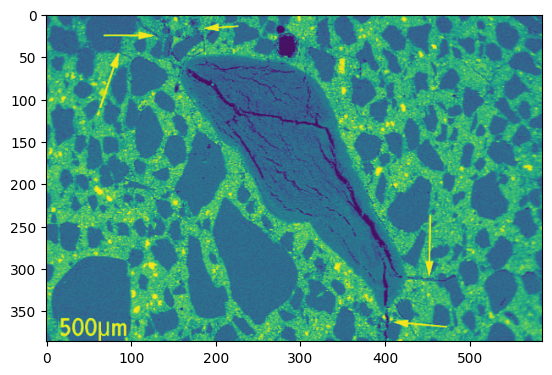

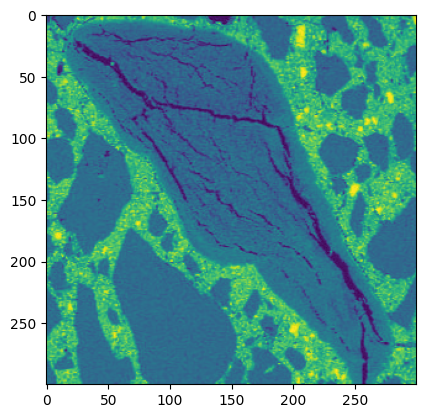

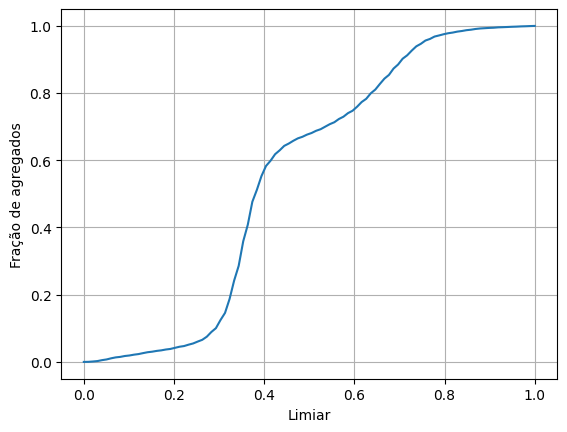

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

def zoom(A, tamanho): # faz o zoom da matriz, retornando uma matriz (tamanho, tamanho)
  return A[int((A.shape[0]/2) - (tamanho/2)) : int((A.shape[0]/2) + (tamanho/2)), int((A.shape[1]/2) - (tamanho/2)) : int((A.shape[1]/2) + (tamanho/2))]

def normaliza(A):
  return (1/255) * A

def fracao_agregados(A, limiar):
  contador = (A < limiar).sum() # conta todos os componentes da matriz menores que limiar, pois (A < limiar) retorna 1 quando é e 0 caso contrário
  fracao = contador / (A.shape[0] * A.shape[1])
  return fracao

img = mpimg.imread('concrete.jpg')
A = img[:, :, 0]

plt.figure()
plt.imshow(A)
plt.show()

tamanho = 300

A = zoom(A, tamanho)
A = normaliza(A)

plt.figure()
plt.imshow(A)
plt.show()

# Gráfico fracao x limiar

array_limiar = np.linspace(0, 1, 100)
fracoes = np.array([])
for limiar in array_limiar: # cria a array de fracoes
  fracoes = np.append(fracoes, fracao_agregados(A, limiar))
plt.figure()
plt.plot(array_limiar, fracoes)
plt.xlabel('Limiar')
plt.ylabel('Fração de agregados')
plt.grid()
plt.show()

O limiar ideal parece ser algo em torno de 0.35

Questão 5

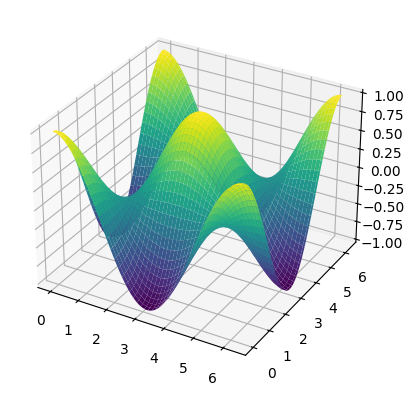

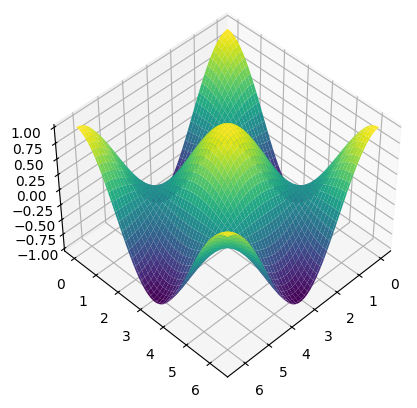

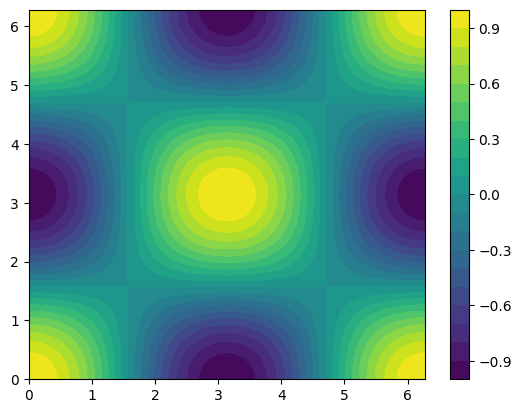

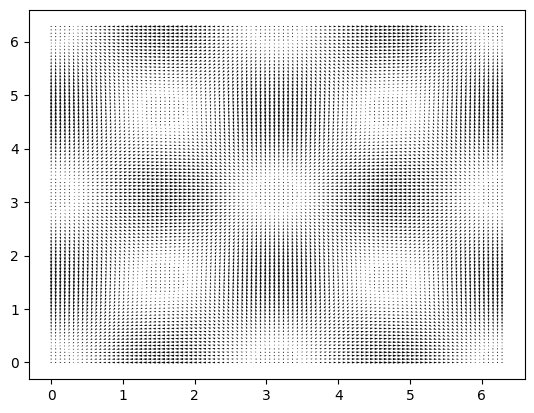

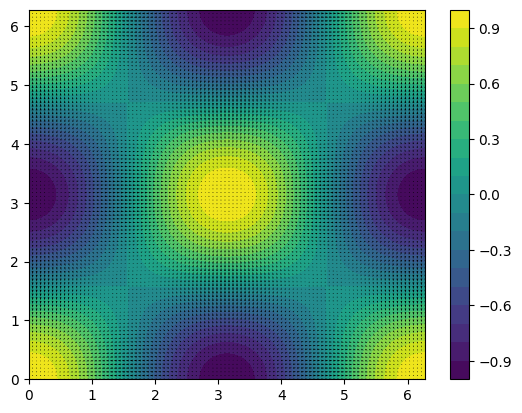

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
  return np.cos(x) * np.cos(y)

def gradf(x, y): # gradiente de f
  vetor = -1 * np.array([np.cos(y) * np.sin(x), np.cos(x) * np.sin(y)])
  return vetor

# Gráfico superfície 3D

X = np.linspace(0, 2*np.pi, 100)
Y = np.linspace(0, 2*np.pi, 100)
X, Y = np.meshgrid(X, Y) # transforma em duas matrizes grades
Z = f(X, Y)

# Vista padrão
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()

# Vista modificada
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.view_init(elev=45, azim=45)
plt.show()

# Gráfico curvas de nível

plt.contourf(X, Y, Z, 20, cmap='viridis')
plt.colorbar()
plt.show()

# Gráfico gradiente

plt.figure()
plt.quiver(X, Y, gradf(X, Y)[0], gradf(X, Y)[1]) # Adjusted scale, width, and color
plt.show()

# Gráfico sobreposição curvas de nível e gradiente

plt.figure()
plt.contourf(X, Y, Z, 20, cmap='viridis')
plt.colorbar()
plt.quiver(X, Y, gradf(X, Y)[0], gradf(X, Y)[1])
plt.show()

Questão 6 - parte 1

In [ ]:
import numpy as np

def F21(r1, r2):
  r12 = r2 - r1
  return -1 * (gamma * m1 * m2 / np.linalg.norm(r12)**3) * r12

def F12(r1, r2):
  return -1 * F21(r1, r2)

# Parâmetros
gamma = 1
dt = 0.01
m1 = 1
m2 = 0.001
N_steps = 2000
r1 = np.array([0, 0])
v1 = np.array([0, 0])
r2 = np.array([1, 0])
v2 = np.array([0, 1])

Tfin = int(N_steps * dt) # tempo final
print(Tfin)

tn = 0
n = 0
solution = np.zeros((N_steps, 9)) # matriz com N_steps linhas e 9 colunas

while(tn < Tfin):

  # Calcular a aceleração
  a1 = F12(r1, r2) / m1
  a2 = F21(r1, r2) / m2

  # Atualizar a posição
  r1 = r1 + v1 * dt + 0.5 * a1 * dt**2
  r2 = r2 + v2 * dt + 0.5 * a2 * dt**2

  # Atualizar a aceleração
  a1_depois = F12(r1, r2) / m1
  a2_depois = F21(r1, r2) / m2

  # Atualizar a velocidade
  v1 = v1 + 0.5 * (a1 + a1_depois) * dt
  v2 = v2 + 0.5 * (a2 + a2_depois) * dt

  # Guardar os dados atuais
  solution[n, :] = tn, r1[0], r1[1], v1[0], v1[1], r2[0], r2[1], v2[0], v2[1] # preenche a linha n com as 9 grandezas

  # Incrementar o tempo e o passo
  tn = tn + dt
  n = n + 1

# Salvar em um arquivo txt
np.savetxt('evol.txt', solution)

20


Questão 6 - parte 2

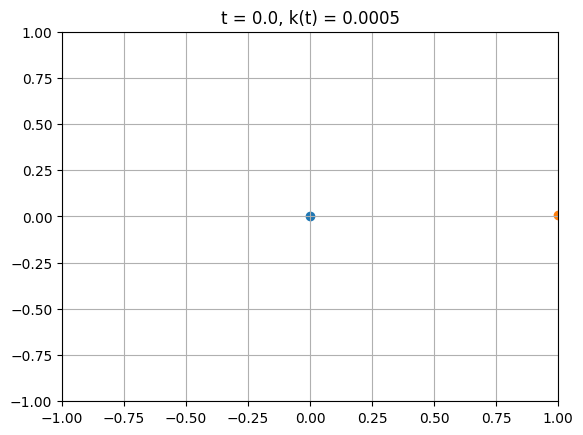

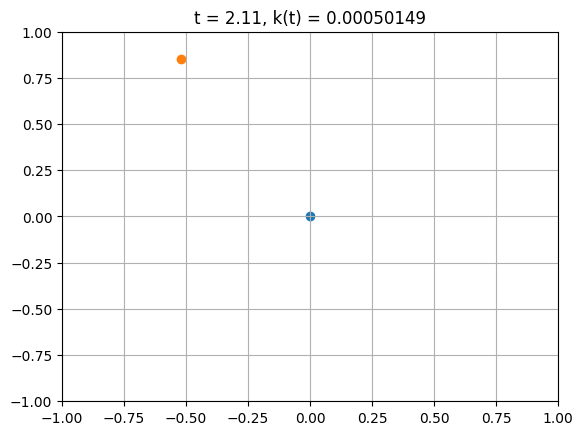

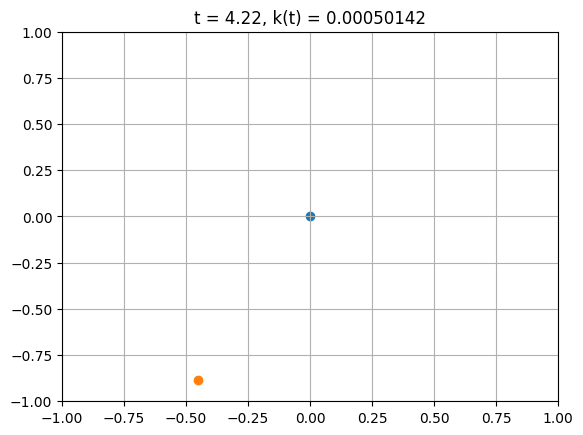

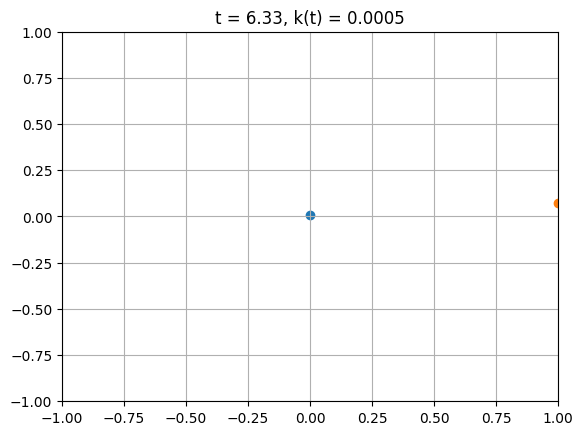

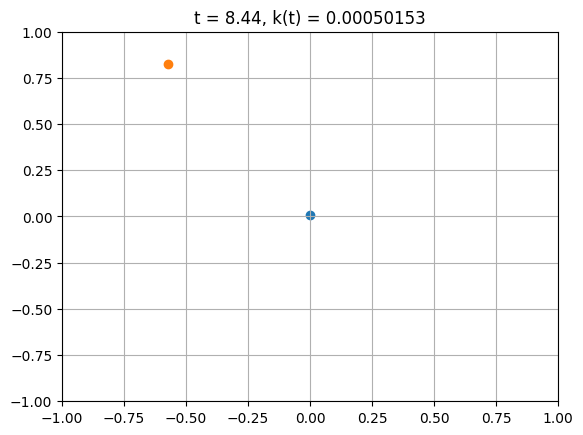

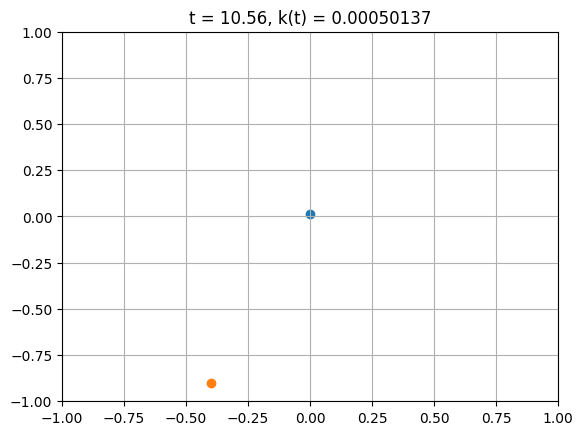

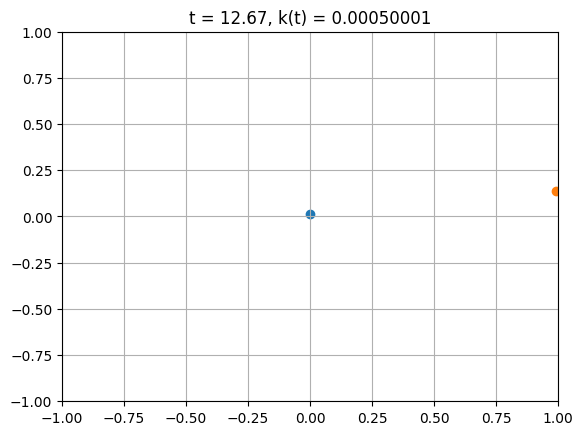

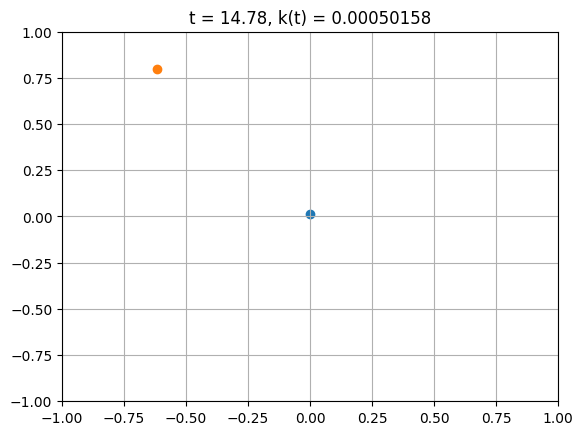

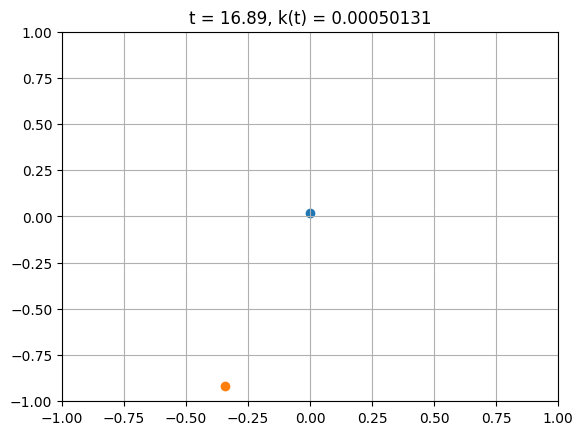

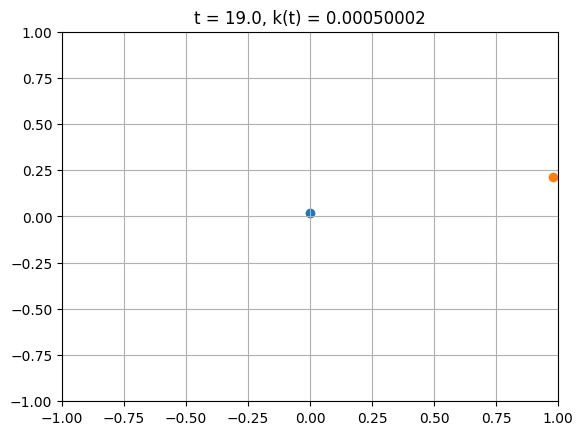

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Carregar arquivo txt
dados = np.loadtxt('evol.txt')

# Posição em função do tempo
def r(i,t):
  n = int(len(dados) * t / Tfin)
  if i == 1:
    r = np.array([dados[n, 1], dados[n, 2]])
  elif i == 2:
    r = np.array([dados[n, 5], dados[n, 6]])
  return r

# Velocidade em função do tempo
def v(i, t):
  n = int(len(dados) * t / Tfin)
  if i == 1:
    v = np.array([dados[n, 3], dados[n, 4]])
  elif i == 2:
    v = np.array([dados[n, 7], dados[n, 8]])
  return v

# Energia cinética em função do tempo
def K(t):
  E1 = m1 * np.sum(v(1, t)**2) / 2
  E2 = m2 * np.sum(v(2, t)**2) / 2
  return E1 + E2

# Loop mostrando o plot para alguns frames
for t in np.linspace(0, Tfin-1, 10):
  plt.figure()
  plt.scatter(r(1, t)[0], r(1, t)[1])
  plt.scatter(r(2, t)[0], r(2, t)[1])
  plt.title(f't = {round(t, 2)}, k(t) = {round(K(t), 8)}')
  plt.grid(True)
  plt.xlim(-1, 1)
  plt.ylim(-1, 1)
  plt.show()

Questão 6 - parte 3

Vídeo salvo como animacao.mp4


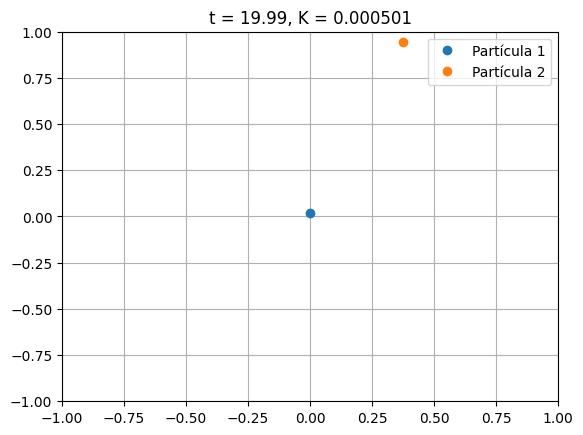

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

dados = np.loadtxt('evol.txt')

# Parâmetros
Tfin = dados[-1, 0]
dt = dados[1, 0] - dados[0, 0]
m1 = 1
m2 = 0.001

def r(i,t):
    n = int(len(dados) * t / Tfin)
    n = min(n, len(dados)-1)
    if i == 1:
        return np.array([dados[n, 1], dados[n, 2]])
    if i == 2:
        return np.array([dados[n, 5], dados[n, 6]])

def v(i,t):
    n = int(len(dados) * t / Tfin)
    n = min(n, len(dados)-1)
    if i == 1:
        return np.array([dados[n, 3], dados[n, 4]])
    if i == 2:
        return np.array([dados[n, 7], dados[n, 8]])

def K(t):
    E1 = m1 * np.sum(v(1, t)**2) / 2
    E2 = m2 * np.sum(v(2, t)**2) / 2
    return E1 + E2

fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.grid(True)

p1, = ax.plot([], [], 'o', label='Partícula 1')
p2, = ax.plot([], [], 'o', label='Partícula 2')
ax.legend()

def init():
    p1.set_data([], [])
    p2.set_data([], [])
    return p1, p2

def update(frame):
    t = frame * dt
    r1 = r(1, t)
    r2 = r(2, t)
    p1.set_data([r1[0]], [r1[1]]) # Fixed: wrap scalars in lists
    p2.set_data([r2[0]], [r2[1]]) # Fixed: wrap scalars in lists
    ax.set_title(f"t = {round(t,3)}, K = {round(K(t),6)}")
    return p1, p2

frames = len(dados)
ani = FuncAnimation(fig, update, init_func=init, frames=frames, blit=True)

writer = FFMpegWriter(fps=30)
ani.save("animacao.mp4", writer=writer)

print("Vídeo salvo como animacao.mp4")

Questão 7

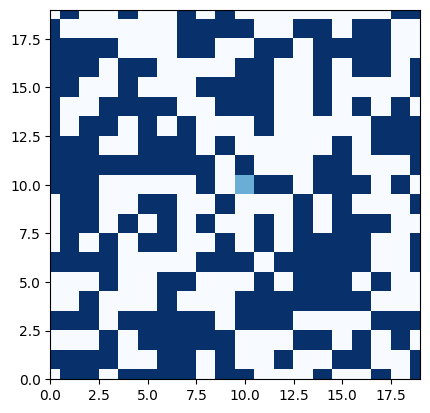

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def init():
  A = np.random.choice([0, 2], size=(N, N)) # matriz com 0 e 2 aleatórios
  A[N//2, N//2] = 1 # o meio se inicializa com 1
  img.set_data(A) # transforma matriz em imagem
  return [img]

def update(frame):
  A = img.get_array() # transforma imagem em array numpy
  B = A.copy()

  # Preenchimento das casas com água segundo as regras
  for i in range(N):
    for j in range(N):
        if A[i,j] == 1:
            if i+1 < N and A[i+1,j] != 2:
                B[i+1,j] = 1
            if i-1 >= 0 and A[i-1,j] != 2:
                B[i-1,j] = 1
            if j+1 < N and A[i,j+1] != 2:
                B[i,j+1] = 1
            if j-1 >= 0 and A[i,j-1] != 2:
                B[i,j-1] = 1

  img.set_data(B)
  return [img]

N = 20 # Para gerar matriz N x N

# Preparar figura
fig, ax = plt.subplots()
ax.set_xlim(0, N-1)
ax.set_ylim(0, N-1)

img = ax.imshow(np.zeros((N, N)), vmin=0, vmax=2, cmap='Blues')

ani = FuncAnimation(fig, update, init_func=init, frames=50, interval=300, blit=True)
plt.show()

# vazio (0) é roxo
# água (1) é azul
# obstáculo (2) é amarelo

Questão 8 - exemplo

In [ ]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

def bubble_sort(arr):
  # Para cada item i da lista, ordena um por um (invertendo a ordem) todos os itens j atrás desse item i
  # Ao final de um loop maior, o maior item vai para a direita
  n = len(arr)
  for i in range(n):
    print(arr)
    for j in range(0, n-i-1):
      if arr[j] > arr[j+1]:
        arr[j], arr[j+1] = arr[j+1], arr[j]
  return arr

def selection_sort(arr):
  # Para cada item i da lista, procura o valor mínimo menor que ele e coloca nessa posição
  # O valor mínimo é descoberto pelo loop em j, que compara todos os itens até o final e atualiza quando acha um menor que o atual
  n = len(arr)
  for i in range(n):
    print(arr)
    min_idx = i
    for j in range(i+1, n):
      if arr[j] < arr[min_idx]:
       min_idx = j
    arr[i], arr[min_idx] = arr[min_idx], arr[i]
  return arr

def quick_sort(arr):
  # o pivot é a mediana
  # divide a lista entre a primeira metade e a segunda parte
  # substitui pelos valores menores que o pivot à esquerda e os maiores à direita
  # aplica recursivamente nessas duas novas listas menores e maiores que o pivot
  if len(arr) <= 1:
    return arr
  pivot = arr[len(arr) // 2]
  left = [x for x in arr if x < pivot]
  middle = [x for x in arr if x == pivot]
  right = [x for x in arr if x > pivot]
  print('Esquerda: ',left)
  print('Meio: ',middle)
  print('Direita: ',right)
  print(left+middle+right)
  return quick_sort(left) + middle + quick_sort(right)

array_exemplo = [64, 34, 25, 12, 22, 11, 12]

print("Array original:")
print(array_exemplo)

print('Bubble Sort:')
print(bubble_sort(array_exemplo.copy()))

print('Selection Sort')
print(selection_sort(array_exemplo.copy()))

print('Quick Sort (de trás para frente)')
print(quick_sort(array_exemplo.copy()))

Array original:
[64, 34, 25, 12, 22, 11, 12]
Bubble Sort:
[64, 34, 25, 12, 22, 11, 12]
[34, 25, 12, 22, 11, 12, 64]
[25, 12, 22, 11, 12, 34, 64]
[12, 22, 11, 12, 25, 34, 64]
[12, 11, 12, 22, 25, 34, 64]
[11, 12, 12, 22, 25, 34, 64]
[11, 12, 12, 22, 25, 34, 64]
[11, 12, 12, 22, 25, 34, 64]
Selection Sort
[64, 34, 25, 12, 22, 11, 12]
[11, 34, 25, 12, 22, 64, 12]
[11, 12, 25, 34, 22, 64, 12]
[11, 12, 12, 34, 22, 64, 25]
[11, 12, 12, 22, 34, 64, 25]
[11, 12, 12, 22, 25, 64, 34]
[11, 12, 12, 22, 25, 34, 64]
[11, 12, 12, 22, 25, 34, 64]
Quick Sort (de trás para frente)
Esquerda:  [11]
Meio:  [12, 12]
Direita:  [64, 34, 25, 22]
[11, 12, 12, 64, 34, 25, 22]
Esquerda:  [22]
Meio:  [25]
Direita:  [64, 34]
[22, 25, 64, 34]
Esquerda:  []
Meio:  [34]
Direita:  [64]
[34, 64]
[11, 12, 12, 22, 25, 34, 64]


Questão 8 - tempos de execução

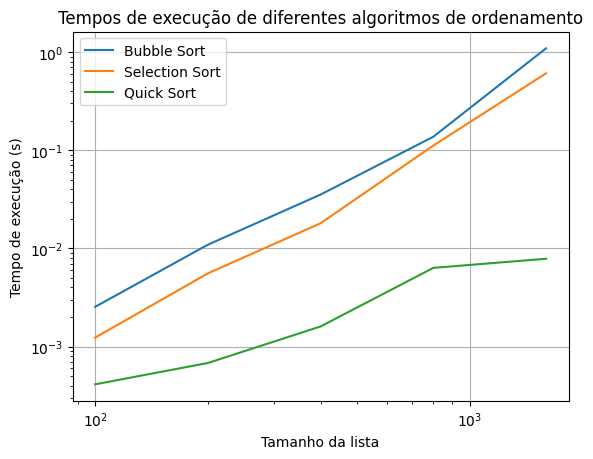

In [ ]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

def bubble_sort(arr):
  # Para cada item i da lista, ordena um por um (invertendo a ordem) todos os itens j atrás desse item i
  # Ao final de um loop maior, o maior item vai para a direita
  n = len(arr)
  for i in range(n):
    for j in range(0, n-i-1):
      if arr[j] > arr[j+1]:
        arr[j], arr[j+1] = arr[j+1], arr[j]
  return arr

def selection_sort(arr):
  # Para cada item i da lista, procura o valor mínimo menor que ele e coloca nessa posição
  # O valor mínimo é descoberto pelo loop em j, que compara todos os itens até o final e atualiza quando acha um menor que o atual
  n = len(arr)
  for i in range(n):
    min_idx = i
    for j in range(i+1, n):
      if arr[j] < arr[min_idx]:
       min_idx = j
    arr[i], arr[min_idx] = arr[min_idx], arr[i]
  return arr

def quick_sort(arr):
  # o pivot é a mediana
  # divide a lista entre a primeira metade e a segunda parte
  # substitui pelos valores menores que o pivot à esquerda e os maiores à direita
  # aplica recursivamente nessas duas novas listas menores e maiores que o pivot
  if len(arr) <= 1:
    return arr
  pivot = arr[len(arr) // 2]
  left = [x for x in arr if x < pivot]
  middle = [x for x in arr if x == pivot]
  right = [x for x in arr if x > pivot]
  return quick_sort(left) + middle + quick_sort(right)

tempos_bubble = []
tempos_selection = []
tempos_quick = []
lista_N = [100, 200, 400, 800, 1600]

for N in lista_N:
  original_arr = np.random.rand(N)

  # bubble
  arr_bubble = original_arr.copy()
  start_time = time()
  bubble_sort(arr_bubble)
  end_time = time()
  tempos_bubble.append(end_time - start_time)

  # selection
  arr_selection = original_arr.copy()
  start_time = time()
  selection_sort(arr_selection)
  end_time = time()
  tempos_selection.append(end_time - start_time)

  # quick
  arr_quick = original_arr.copy()
  start_time = time()
  quick_sort(arr_quick)
  end_time = time()
  tempos_quick.append(end_time - start_time)

# Gráfico loglog
plt.figure()
plt.plot(lista_N, tempos_bubble, label="Bubble Sort")
plt.plot(lista_N, tempos_selection, label="Selection Sort")
plt.plot(lista_N, tempos_quick, label="Quick Sort")
plt.xlabel('Tamanho da lista')
plt.ylabel('Tempo de execução (s)')
plt.grid(True)
plt.xscale("log")
plt.yscale("log")
plt.title("Tempos de execução de diferentes algoritmos de ordenamento")
plt.legend()
plt.show()

Quick Sort é o mais rápido e parece ter um crescimento de complexidade mais lento